Caravan Insurance Challenge
<BR>Group 2</BR>

* Aman Manocha -015001 
* Umang Dhar Dwivedi -015017 
* Paras Mahajan -015037 
* Merlin -015027 
* Parul singla -015023




**Objective** - In the notebook we analysed this classification problem using supervised learning models. In present notebook we analysed the Model using following supervised modeling techniques - Decision Tree Model - Random Forest Model -KNN 

We are predicting the dataset using various models and find the prediction score of all the models.


**Dataset Description and Usage**
The dataset that was obtained consists of 86 features, which includes 
insurance product usage data and social-demographic data. The first 43 attributes are demographic and social data, whereas, the remaining 43 variables are insurance product usage related data which indicate customers of the company’s existing policies such as fire, boat, life, etc. The variable of interest in this dataset is Number_of_mobile_home_policies, which indicates the observations that have bought caravan insurance. This dataset is not set up as individual customer observations and each row represents a group of customers i.e., a large sample size. This might have been done to utilize all the observations and at the same time, keep the number of rows in the dataset to be manageable

The field ORIGIN in the caravan-insurance-challenge.csv file has the values train and test, corresponding to the training and evaluation sets, respectively. Each observation corresponds to a postal code. Variables beginning with M refer to demographic statistics of the postal code, while variables beginning with P and A (as well as CARAVAN, the target variable) refer to product ownership and insurance statistics in the postal code.

The dataset contains the following features:
The data file contains the following fields:

* ORIGIN: train or test, as described above
* MOSTYPE: Customer Subtype; see L0
* MAANTHUI: Number of houses 1 - 10
* MGEMOMV: Avg size household 1 - 6
* MGEMLEEF: Avg age; see L1
* MOSHOOFD: Customer main type; see L2


**Percentages in each group, per postal code (see L3):**

* MGODRK: Roman catholic
* MGODPR: Protestant …
* MGODOV: Other religion
* MGODGE: No religion
* MRELGE: Married
* MRELSA: Living together
* MRELOV: Other relation
* MFALLEEN: Singles
* MFGEKIND: Household without children
* MFWEKIND: Household with children
* MOPLHOOG: High level education
* MOPLMIDD: Medium level education
* MOPLLAAG: Lower level education
* MBERHOOG: High status
* MBERZELF: Entrepreneur
* MBERBOER: Farmer
* MBERMIDD: Middle management
* MBERARBG: Skilled labourers
* MBERARBO: Unskilled labourers
* MSKA: Social class A
* MSKB1: Social class B1
* MSKB2: Social class B2
* MSKC: Social class C
* MSKD: Social class D
* MHHUUR: Rented house
* MHKOOP: Home owners
* MAUT1: 1 car
* MAUT2: 2 cars
* MAUT0: No car
* MZFONDS: National Health Service
* MZPART: Private health insurance
* MINKM30: Income < 30.000
* MINK3045: Income 30-45.000
* MINK4575: Income 45-75.000
* MINK7512: Income 75-122.000
* MINK123M: Income >123.000
* MINKGEM: Average income
* MKOOPKLA: Purchasing power class


**Total number of variable in postal code (see L4):**
* PWAPART: Contribution private third party insurance
* PWABEDR: Contribution third party insurance (firms) …
* PWALAND: Contribution third party insurane (agriculture)
* PPERSAUT: Contribution car policies
* PBESAUT: Contribution delivery van policies
* PMOTSCO: Contribution motorcycle/scooter policies
* PVRAAUT: Contribution lorry policies
* PAANHANG: Contribution trailer policies
* PTRACTOR: Contribution tractor policies
* PWERKT: Contribution agricultural machines policies
* PBROM: Contribution moped policies
* PLEVEN: Contribution life insurances
* PPERSONG: Contribution private accident insurance policies
* PGEZONG: Contribution family accidents insurance policies
* PWAOREG: Contribution disability insurance policies
* PBRAND: Contribution fire policies
* PZEILPL: Contribution surfboard policies
* PPLEZIER: Contribution boat policies
* PFIETS: Contribution bicycle policies
* PINBOED: Contribution property insurance policies
* PBYSTAND: Contribution social security insurance policies
* AWAPART: Number of private third party insurance 1 - 12
* AWABEDR: Number of third party insurance (firms) …
* AWALAND: Number of third party insurance (agriculture)
* APERSAUT: Number of car policies
* ABESAUT: Number of delivery van policies
* AMOTSCO: Number of motorcycle/scooter policies
* AVRAAUT: Number of lorry policies
* AAANHANG: Number of trailer policies
* ATRACTOR: Number of tractor policies
* AWERKT: Number of agricultural machines policies
* ABROM: Number of moped policies
* ALEVEN: Number of life insurances
* APERSONG: Number of private accident insurance policies
* AGEZONG: Number of family accidents insurance policies
* AWAOREG: Number of disability insurance policies
* ABRAND: Number of fire policies
* AZEILPL: Number of surfboard policies
* APLEZIER: Number of boat policies
* AFIETS: Number of bicycle policies
* AINBOED: Number of property insurance policies
* ABYSTAND: Number of social security insurance policies
* CARAVAN: Number of mobile home policies 0 - 1

**Keys (L1 - L4)**
L0: Customer subtype
* 1: High Income, expensive child
* 2: Very Important Provincials
* 3: High status seniors
* 4: Affluent senior apartments
* 5: Mixed seniors
* 6: Career and childcare
* 7: Dinki's (double income no kids)
* 8: Middle class families
* 9: Modern, complete families
* 10: Stable family
* 11: Family starters
* 12: Affluent young families
* 13: Young all american family
* 14: Junior cosmopolitan
* 15: Senior cosmopolitans
* 16: Students in apartments
* 17: Fresh masters in the city
* 18: Single youth
* 19: Suburban youth
* 20: Etnically diverse
* 21: Young urban have-nots
* 22: Mixed apartment dwellers
* 23: Young and rising
* 24: Young, low educated
* 25: Young seniors in the city
* 26: Own home elderly
* 27: Seniors in apartments
* 28: Residential elderly
* 29: Porchless seniors: no front yard
* 30: Religious elderly singles
* 31: Low income catholics
* 32: Mixed seniors
* 33: Lower class large families
* 34: Large family, employed child
* 35: Village families
* 36: Couples with teens 'Married with children'
* 37: Mixed small town dwellers
* 38: Traditional families
* 39: Large religous families
* 40: Large family farms
* 41: Mixed rurals

**L1: average age keys:**
* 1: 20-30 years
* 2: 30-40 years
* 3: 40-50 years
* 4: 50-60 years
* 5: 60-70 years
* 6: 70-80 year

**L2: customer main type keys:**
* 1: Successful hedonists
* 2: Driven Growers
* 3: Average Family
* 4: Career Loners
* 5: Living well
* 6: Cruising Seniors
* 7: Retired and Religeous
* 8: Family with grown ups
* 9: Conservative families
* 10: Farmers

**L3: percentage keys:**

* 0: 0%
* 1: 1 - 10%
* 2: 11 - 23%
* 3: 24 - 36%
* 4: 37 - 49%
* 5: 50 - 62%
* 6: 63 - 75%
* 7: 76 - 88%
* 8: 89 - 99%
* 9: 100%





**L4: total number keys:**
* 0: 0
* 1: 1 - 49
* 2: 50 - 99
* 3: 100 - 199
* 4: 200 - 499
* 5: 500 - 999
* 6: 1000 - 4999
* 7: 5000 - 9999
* 8: 10,000 - 19,999
* 9: >= 20,000

##Data Exploration

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import matplotlib.pyplot as plt

from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from pandas.io.parsers import read_csv
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings('ignore')

In [8]:
df= pd.read_csv('caravan-insurance-challenge.csv')

In [9]:
df.shape

(9822, 87)

In [10]:
df.head() 

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


All the columns are of Categorical in Nature i.e. unique values are from 1 to 40

In [11]:
df.columns.values

array(['ORIGIN', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA',
       'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG',
       'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER',
       'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2',
       'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0',
       'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512',
       'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND',
       'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APL

In [12]:
df.nunique()

ORIGIN       2
MOSTYPE     40
MAANTHUI     9
MGEMOMV      6
MGEMLEEF     6
            ..
APLEZIER     3
AFIETS       5
AINBOED      3
ABYSTAND     3
CARAVAN      2
Length: 87, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

In [14]:
df.nunique()

ORIGIN       2
MOSTYPE     40
MAANTHUI     9
MGEMOMV      6
MGEMLEEF     6
            ..
APLEZIER     3
AFIETS       5
AINBOED      3
ABYSTAND     3
CARAVAN      2
Length: 87, dtype: int64

In [17]:
df.describe(include='all')

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,NaN,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,NaN,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,NaN,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,NaN,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


* Standard Deviation for 25% of the values is nearly 0 and for 75% of the values is slightly towards higher side, which means that Dataset is slightly right skewed. </font>
* From the above table it can be refernced that the there is no outliers in our dataset.

### Handling missing values

In [18]:
df.isnull().values.any()

False

In [19]:
df.isnull().sum()

ORIGIN      0
MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 87, dtype: int64

No Null values

In [20]:
df.CARAVAN.value_counts()

0    9236
1     586
Name: CARAVAN, dtype: int64

**Highly Imbalanced Data**

While analysing the target variable column CARAVAN we find dataset is highly imbalance as huge difference in count of target variable i.e. Count of Target Variable Caravan with 0 = 9236 Count of Target Variable Caravan with 1 = 586 In this case accuracy is not very useful matrics. We have to work on confusion matrics and analyse performance better.

### Data Visualization

In [23]:
fig = plt.figure(figsize=(30,20));
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

###Split Dataset as Train and Test from 'ORIGIN' feature

In [24]:
cc_no_origin_train = df[df['ORIGIN']=='train'].drop(['ORIGIN'], axis=1)
cc_no_origin_train.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [25]:
cc_no_origin_test = df[df['ORIGIN']=='test'].drop(['ORIGIN'], axis=1)
cc_no_origin_test.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
5822,33,1,4,2,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,0
5823,6,1,3,2,2,0,5,0,4,5,...,0,0,0,1,0,0,0,0,0,1
5824,39,1,3,3,9,1,4,2,3,5,...,0,0,0,1,0,0,0,0,0,0
5825,9,1,2,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
5826,31,1,2,4,7,0,2,0,7,9,...,0,0,0,1,0,0,0,0,0,0


### Count of different values in CARAVAN & different values in customer subtype

In [26]:
fig = plt.figure(figsize=(10,10));

# Plot Telling the total count of different values in CARAVAN
plt.subplot(3,1,1);
cc_no_origin_train['CARAVAN'].value_counts().plot(kind='bar', title='Classifying CARAVAN', color='#10bbd4', grid=True);

# Plot Telling the total count of different values in customer subtype
plt.subplot(3,1,2);
cc_no_origin_train['MOSTYPE'].value_counts().plot(kind='bar', align='center', title='Classifying Customer Subtypes', color='#10bbd4', grid=True);

So, Lower class large families Customer Subtypes are more and Negligible Number of Customers bought CARAVAN mobile home policies



### Dependency of prefering caravan policy based on category subtype

In [31]:

categorysubtype_caravan = pd.crosstab(cc_no_origin_train['MOSTYPE'], cc_no_origin_train['CARAVAN']);
categorysubtype_caravan_percentage = categorysubtype_caravan.div(categorysubtype_caravan.sum(1).astype(float), axis=0);
categorysubtype_caravan_percentage.plot(figsize= (15,10), kind='barh', stacked=True, color=['#10bbd4', 'Crimson'], title='Category Subtype vs Caravan', grid=True);
plt.xlabel('Category Subtype');
plt.ylabel('CARAVAN or not');

Senior cosmopolitans, Students in apartments, Fresh masters in the city, Single youth, Suburban youth, Large family farms don't have a single Caravan Policy whereas Middle class families, Affluent young families subtypes have most of the Caravan Policies

### Dependency of preferring caravan policy based on age

In [30]:
cc_no_origin_train['MGEMLEEF'].hist(figsize=(5,3), fc='#10bbd4', grid=True);
plt.xlabel('age');
plt.ylabel('count');

40-50 Yrs Age group bought most policies whereas 20-30 & 70-80 Age groups don't prefer buying any Policies



In [32]:
age_caravan = pd.crosstab(cc_no_origin_train['MGEMLEEF'], cc_no_origin_train['CARAVAN']);
age_caravan_percentage = age_caravan.div(age_caravan.sum(1).astype(float),axis=0);
age_caravan_percentage.plot(figsize=(5,3), kind='barh', stacked=True, color=['#10bbd4', 'Crimson'], title='Dependency of Caravan on age groups', grid=True);
plt.xlabel('Age Groups');
plt.ylabel('Caravan');

Age group 1: 20-30yrs don't prefer the caravan policy. thus Age, Subtype are important features for correct classification.

### Dependency of prefering Caravan policy based on Customer type

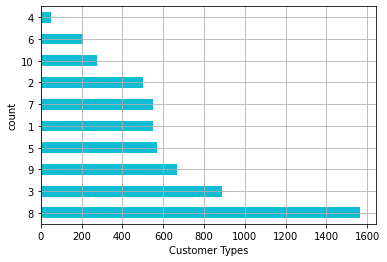

In [ ]:
cc_no_origin_train['MOSHOOFD'].value_counts().plot(kind='barh', color='#10bbd4', grid=True);
plt.xlabel('Customer Types');
plt.ylabel('count');

Customer types count is highest at 8  and lowest at 4


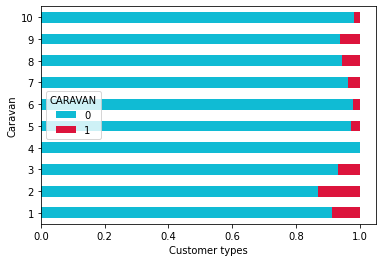

In [ ]:
cust_type_caravan = pd.crosstab(cc_no_origin_train['MOSHOOFD'], cc_no_origin_train['CARAVAN']);
cust_type_caravan_percentage = cust_type_caravan.div(cust_type_caravan.sum(1).astype(float), axis=0);
cust_type_caravan_percentage.plot(kind='barh', stacked=True, color = ['#10bbd4', 'Crimson']);
plt.xlabel('Customer types');
plt.ylabel('Caravan');

We can verify that Customer main types 'Family with grown ups' and 'Driven Growers' are important features

##Drop unnecessary columns

In [ ]:
#Remove unnecessary columns
#check standard deviation.if std() is zero drop those columns
#Removal list initialize
rem = []

#Add constant columns as they don't help in prediction process
for c in cc_no_origin_train.columns:
    if cc_no_origin_train[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
cc_no_origin_train.drop(rem,axis=1,inplace=True)

print(rem)

#Following columns are dropped

[]


No unnecessary columns found

##Feature Engineering

###Splitting the dataset

In [ ]:
#Divide the train and test data into X_train,y_train,X_test and y_test

y_train = cc_no_origin_train.pop("CARAVAN")
X_train = cc_no_origin_train
y_test = cc_no_origin_test.pop("CARAVAN")
X_test = cc_no_origin_test

###Handling Numerical and Categorical Attributes

In [ ]:
colunique=X_train.nunique
cols= (X_train.nunique() < 41 )
cols
cat_cols = cols[cols==True].index.tolist()
num_cols = cols[cols==False].index.tolist()
cat_cols
num_cols

[]

###Applying MinMax Scaling 




In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [ ]:
X_scaled = preprocessing.scale(X_train)

##Modelling

In [ ]:
X_train.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.800,0.0,0.50,0.2,0.777778,0.000000,0.555556,0.2,0.333333,0.777778,0.000000,0.222222,0.111111,0.222222,0.666667,0.111111,0.222222,0.777778,0.111111,0.0,0.111111,0.222222,0.555556,0.222222,0.111111,0.111111,0.222222,0.666667,0.111111,0.111111,0.888889,0.888889,0.000000,0.111111,0.888889,0.111111,0.000000,0.444444,0.555556,0.000000,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
1,0.900,0.0,0.25,0.2,0.777778,0.111111,0.444444,0.2,0.444444,0.666667,0.285714,0.222222,0.000000,0.444444,0.555556,0.000000,0.555556,0.444444,0.000000,0.0,0.000000,0.555556,0.000000,0.444444,0.000000,0.222222,0.333333,0.555556,0.000000,0.222222,0.777778,0.777778,0.142857,0.222222,0.666667,0.333333,0.222222,0.000000,0.555556,0.222222,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
2,0.900,0.0,0.25,0.2,0.777778,0.000000,0.444444,0.4,0.444444,0.333333,0.285714,0.444444,0.444444,0.444444,0.222222,0.000000,0.555556,0.444444,0.000000,0.0,0.000000,0.777778,0.000000,0.222222,0.000000,0.555556,0.000000,0.444444,0.000000,0.777778,0.222222,0.777778,0.000000,0.222222,1.000000,0.000000,0.444444,0.555556,0.000000,0.000000,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
3,0.200,0.0,0.50,0.4,0.222222,0.222222,0.333333,0.4,0.444444,0.555556,0.285714,0.222222,0.222222,0.333333,0.444444,0.333333,0.444444,0.222222,0.444444,0.0,0.000000,0.333333,0.111111,0.222222,0.333333,0.222222,0.111111,0.444444,0.000000,0.555556,0.444444,1.000000,0.000000,0.000000,0.777778,0.222222,0.111111,0.555556,0.333333,0.000000,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
4,0.975,0.0,0.75,0.2,1.000000,0.111111,0.444444,0.2,0.444444,0.777778,0.142857,0.222222,0.222222,0.444444,0.444444,0.555556,0.444444,0.000000,0.000000,1.0,0.444444,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.555556,0.666667,0.285714,0.111111,0.555556,0.444444,0.000000,0.000000,1.000000,0.000000,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
5822,0.800,0.0,0.75,0.2,0.777778,0.000000,0.666667,0.0,0.333333,0.555556,0.000000,0.444444,0.111111,0.111111,0.888889,0.222222,0.222222,0.666667,0.000000,0.0,0.111111,0.222222,0.666667,0.111111,0.000000,0.222222,0.111111,0.555556,0.333333,0.111111,0.888889,0.888889,0.142857,0.111111,0.888889,0.111111,0.333333,0.333333,0.333333,0.000000,...,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.500,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
5823,0.125,0.0,0.50,0.2,0.111111,0.000000,0.555556,0.0,0.444444,0.555556,0.285714,0.222222,0.111111,0.444444,0.555556,0.555556,0.444444,0.000000,0.555556,0.0,0.000000,0.444444,0.000000,0.000000,0.444444,0.333333,0.000000,0.222222,0.111111,0.333333,0.666667,1.000000,0.000000,0.000000,0.777778,0.222222,0.111111,0.111111,0.555556,0.444444,...,0.0,0.750,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.500,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.142857,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
5824,0.950,0.0,0.50,0.4,0.888889,0.111111,0.444444,0.4,0.333333,0.555556,0.285714,0.333333,0.222222,0.333333,0.666667,0.222222,0.444444,0.444444,0.222222,0.2,0.111111,0.333333,0.222222,0.222222,0.111111,0.111111,0.555556,0.222222,0.111111,0.111111,0.888889,0.666667,0.285714,0.222222,0.666667,0.333333,0.222222,0.444444,0.333333,0.111111,...,0.0,0.750,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.444444,0.0,0.0,0.0,0.500,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.142857,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
5825,0.200,0.0,0.25,0.4,0.222222,0.222222,0.333333,0.4,0.444444,0.555556,0.571429,0.111111,0.222222,0.444444,0.444444,0.222222,0.444444,0.444444,0.222222,0.2,0.111111,0.555556,0.111111,0.222222,0.333333,0.111111,0.333333,0.222222,0.222222,0.333333,0.666667,0.777778,0.285714,0.111111,0.777778,0.222222,0.222222,0.555556,0.333333,0.111111,...,0.0,0.625,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.142857,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
5826,0.750,0.0,0.25,0.6,0.666667,0.000000,0.222222,0.0,0.777778,1.000000,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.222222,0.444444,0.444444,0.000000,0.000000,0.000000,0.777778,0.222222,1.000000,0.000000,0.777778,0.285714,0.000000,1.000000,0.000000,0.555556,0.444444,0.000000,0.000000,...,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0


## Decision Tree Classification

In [ ]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)
y_predict_dt = dt.predict(X_test)
score_dt =np.sum(y_predict_dt ==y_test)/len(y_test)
score_dt

0.93225

Analysing the Data using Decision Tree Classification Model The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

## Target Encoder

In [ ]:
ct = ColumnTransformer([('cde',TargetEncoder(),cat_cols)],remainder ="passthrough")

Usage of Target Encoder instead of One Hot Encoder Since all the variables in this database of type categorical range from 2 to 40 unique values, we use Target Encoder in our notebook as One Hot Encoder increase the size of Database to very high extent.

## Random Forest Classifier 

In [ ]:
rf= RandomForestClassifier(n_estimators =400,oob_score = True,bootstrap=True)    
#Define Pipeline
pipe_rf = Pipeline([('ct',ct),('rf',rf)])
pipe_rf.fit(X_train,y_train)
y_predict_rf = pipe_rf.predict(X_test)
score_rf =np.sum(y_predict_rf ==y_test)/len(y_test)
score_rf

0.93275

###Evaluate the performance of model by Confusion Metrics-Random Forest

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as conf_mat

cf_rf =confusion_matrix(y_test,y_predict_rf)
cf_rf

array([[3718,   44],
       [ 225,   13]])

### Evaluate the performance of model by Classification Report-Random Forest

In [ ]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3762
           1       0.23      0.05      0.09       238

    accuracy                           0.93      4000
   macro avg       0.59      0.52      0.53      4000
weighted avg       0.90      0.93      0.91      4000



Text(0.5, 1.0, 'Predicted vs Actual')

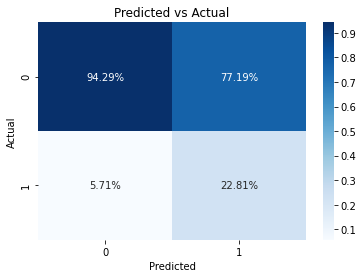

In [ ]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test,y_predict_rf))
confusion_matrix
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.title('Predicted vs Actual')

##KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
#Define Pipeline
pipe_knn = Pipeline([('ct',ct),('knn',knn)])
pipe_knn.fit(X_train,y_train)
y_predict_knn = pipe_knn.predict(X_test)
score_knn =np.sum(y_predict_knn ==y_test)/len(y_test)
score_knn

0.933

###Evaluate the performance of model by Confusion Metrics-KNN

In [ ]:
cf_knn =confusion_matrix(y_test,y_predict_knn)
cf_knn

array([[3724,   38],
       [ 230,    8]])

### Evaluate the performance of model by Classification Report-KNN

In [ ]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3762
           1       0.17      0.03      0.06       238

    accuracy                           0.93      4000
   macro avg       0.56      0.51      0.51      4000
weighted avg       0.90      0.93      0.91      4000



Text(0.5, 1.0, 'Predicted vs Actual')

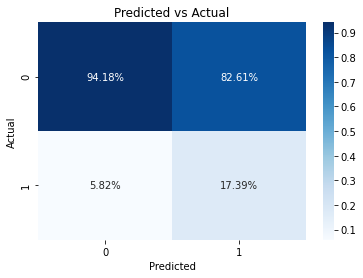

In [ ]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test,y_predict_knn))
confusion_matrix
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.title('Predicted vs Actual')